
# OMDENA - LOS ANGELES CHAPTER
# LA OPEN DATA CHALLENGE
# LA TRAFFIC COLLISION DATA (2010 - today)


## 1. Overview
### 1.1. The Challenge
URL : https://omdena.com/projects/analyzing-open-data-about-los-angeles-metropolitan-area/
Github: https://github.com/OmdenaAI/la-usa-chapter-open-data
GSheets: https://docs.google.com/spreadsheets/d/1iagwjFifZ7Q0eKiVTPUBJs1UmeUrX1Z68Xp8Xlyvxr8/edit#gid=0
Period: Feb - Mar 2023

### 1.2. Project overview
Traffic Collision data (2010 - today)
Data #62 within the gsheet [tab : DATA SRC]https://catalog.data.gov/dataset/traffic-collision-data-from-2010-to-present
Resources (also available in the /data folder):
- Download the data : https://data.lacity.org/api/views/d5tf-ez2w/rows.json?accessType=DOWNLOAD
- The real source of the data : https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w
> + details : metadata, column details
- Modus Operandi Codes (MO Codes): https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf


## 2. Initialization & Data description

### 2.1. Init

In [2]:
import pandas as pd
import numpy as np

In [3]:
traffic_collision_data = pd.read_csv('../data/Traffic_Collision_Data_from_2010_to_Present.csv', index_col='DR Number')
pd.set_option('display.max_rows', 40)

In [4]:
traffic_collision_data.shape

(587905, 17)

In [5]:
traffic_collision_data.head()

,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
DR Number,,,,,,,,,,,,,,,,,
190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [6]:
traffic_collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587905 entries, 190319651 to 230706088
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date Reported           587905 non-null  object 
 1   Date Occurred           587905 non-null  object 
 2   Time Occurred           587905 non-null  int64  
 3   Area ID                 587905 non-null  int64  
 4   Area Name               587905 non-null  object 
 5   Reporting District      587905 non-null  int64  
 6   Crime Code              587905 non-null  int64  
 7   Crime Code Description  587905 non-null  object 
 8   MO Codes                500799 non-null  object 
 9   Victim Age              503009 non-null  float64
 10  Victim Sex              578395 non-null  object 
 11  Victim Descent          577486 non-null  object 
 12  Premise Code            586946 non-null  float64
 13  Premise Description     586945 non-null  object 
 14  Address  

### 2.3. Processing
#### 2.3.1. Data types

In [7]:
traffic_collision_data['Date Reported'] = pd.to_datetime(traffic_collision_data['Date Reported'], format='%m/%d/%Y')
traffic_collision_data['Date Occurred'] = pd.to_datetime(traffic_collision_data['Date Occurred'], format='%m/%d/%Y')
traffic_collision_data.sort_values(by=['Date Occurred'], ascending=True, inplace=True)

#### 2.3.2. Missing value (NaN, None, Null, ' ', ...)

In [8]:
traffic_collision_data.isna().sum()

Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87106
Victim Age                84896
Victim Sex                 9510
Victim Descent            10419
Premise Code                959
Premise Description         960
Address                       0
Cross Street              27914
Location                      0
dtype: int64

However, this analysis focus mainly of collision data number, time and location. Then these missing value do not affect the processing

#### 2.3.3. Target data

In [9]:
target_df = traffic_collision_data.loc[:,['Date Occurred', 'Time Occurred', 'Area ID',
       'Area Name', 'Reporting District', 'Location']]

In [10]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587905 entries, 100604023 to 231806486
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date Occurred       587905 non-null  datetime64[ns]
 1   Time Occurred       587905 non-null  int64         
 2   Area ID             587905 non-null  int64         
 3   Area Name           587905 non-null  object        
 4   Reporting District  587905 non-null  int64         
 5   Location            587905 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 31.4+ MB


In [11]:
target_df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Location
DR Number,,,,,,
100604023,2010-01-01,210,6,Hollywood,632,"(34.0981, -118.3628)"
100604024,2010-01-01,305,6,Hollywood,666,"(34.098, -118.3287)"
110626546,2010-01-01,1155,6,Hollywood,666,"(34.098, -118.3267)"
101304290,2010-01-01,325,13,Newton,1373,"(33.9916, -118.2628)"
101204064,2010-01-01,2115,12,77th Street,1268,"(33.9616, -118.2739)"


## 3. Data vizualisation

In [51]:
target_dates = target_df['Date Occurred']

In [23]:
from matplotlib import pyplot as plt

In [24]:
%matplotlib inline

### 3.1. Yearly collision number

<Axes: xlabel='Date Occurred'>

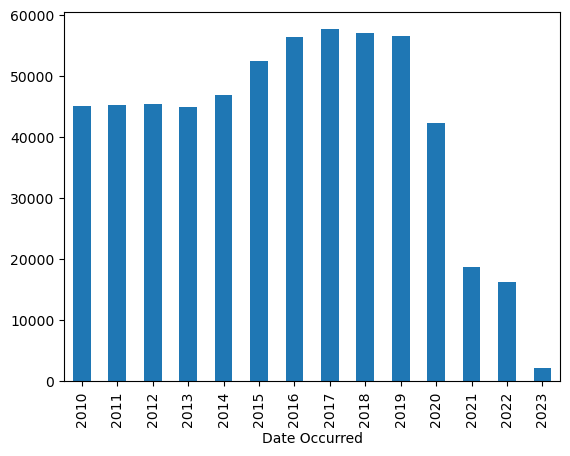

In [52]:
target_df.groupby(target_df['Date Occurred'].dt.year)['Date Occurred'].count().plot(kind='bar')

We see that 2023 numbers are anormally low. May be not-equitably distributed per month ?

In [91]:
target_df['year'] = target_df['Date Occurred'].dt.year
target_df['month'] = target_df['Date Occurred'].dt.month
#target_df
# target_df.groupby(['year'])['month'].nunique()
target_df.groupby(['year']).agg(occurence=('month', 'nunique'))

,occurence
year,
2010,12
2011,12
2012,12
2013,12
2014,12
2015,12
2016,12
2017,12
2018,12


So this table reinforce the initial insight (from bara chart) : 2023 data is imcomplete > lest remove it

In [97]:
target_df = target_df[target_df['year'] <= 2022]
target_df.tail()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Location,year,month
DR Number,,,,,,,,
230904001,2022-12-31,2225,9,Van Nuys,964,"(34.1612, -118.4315)",2022,12
230304014,2022-12-31,2130,3,Southwest,359,"(34.014, -118.2828)",2022,12
221018266,2022-12-31,700,10,West Valley,1088,"(34.1576, -118.5036)",2022,12
220620786,2022-12-31,100,6,Hollywood,666,"(34.0907, -118.3325)",2022,12
221822970,2022-12-31,1900,18,Southeast,1821,"(33.9501, -118.2827)",2022,12


In [99]:
target_df.shape

(585810, 8)

New plot on the number of collision through 2010-2022

Text(0, 0.5, 'Number')

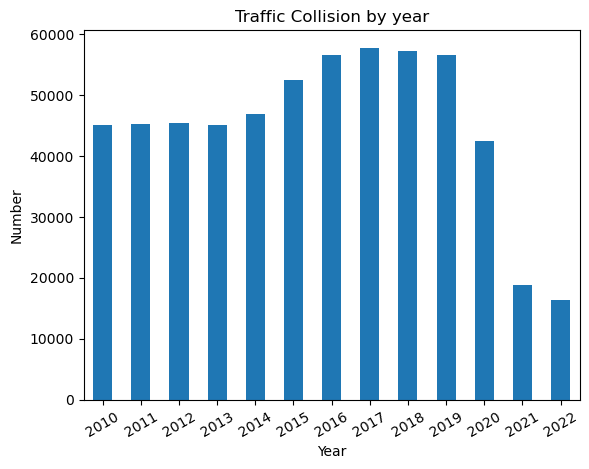

In [111]:
collision_by_year_plot = target_df.groupby(target_df['Date Occurred'].dt.year)['Date Occurred'] \
    .count() \
    .plot(kind='bar', title='Traffic Collision by year', rot=30)
collision_by_year_plot.set_xlabel('Year')
collision_by_year_plot.set_ylabel('Number')


### 3.2. Yearly collision number : per month

<Axes: xlabel='Date Occurred'>

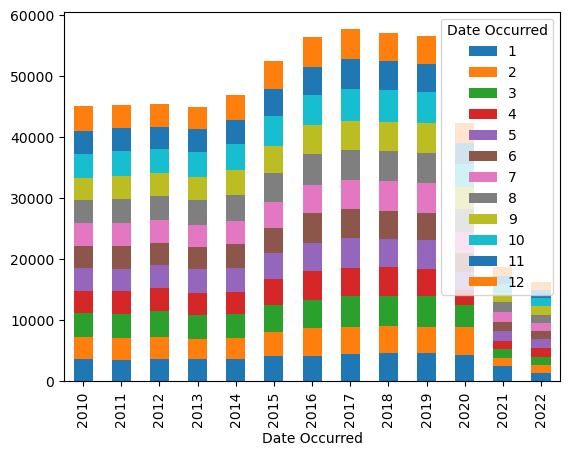

In [119]:
target_df.groupby([target_df['Date Occurred'].dt.year, target_df['Date Occurred'].dt.month])['Date Occurred'] \
    .count().unstack().plot(kind='bar', stacked=True)

Text(0, 0.5, 'Number')

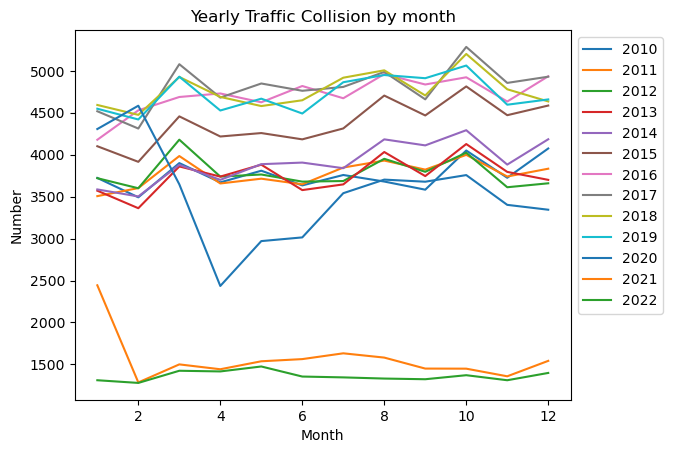

In [135]:
collision_by_month_year_plot = target_df.groupby([target_df['Date Occurred'].dt.month, target_df['Date Occurred'].dt.year])['Date Occurred'] \
    .count().unstack() \
    .plot(title='Yearly Traffic Collision by month')
collision_by_month_year_plot.legend(bbox_to_anchor=(1, 1.0))

collision_by_month_year_plot.set_xlabel('Month')
collision_by_month_year_plot.set_ylabel('Number')

Quite visible pattern ? 
- Decrease on Feb, Sept and Nov
- Increase in March and Aug

### 3.3 Yearly collision per weekday

Text(0, 0.5, 'Number')

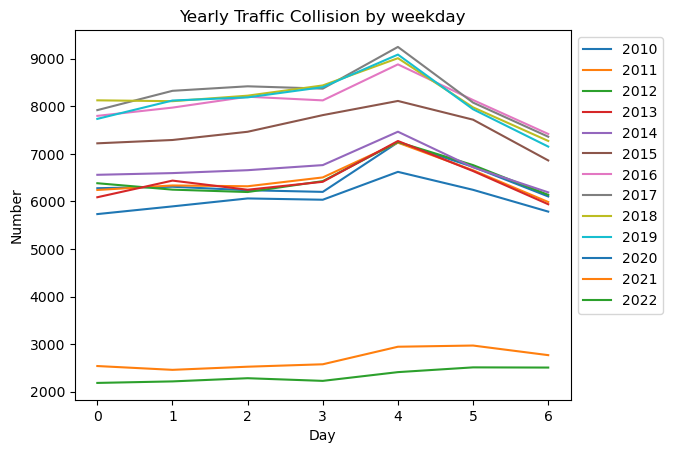

In [137]:
collision_by_weekday_year_plot = target_df.groupby([target_df['Date Occurred'].dt.weekday, target_df['Date Occurred'].dt.year])['Date Occurred'] \
    .count().unstack() \
    .plot(title='Yearly Traffic Collision by weekday')
collision_by_weekday_year_plot.legend(bbox_to_anchor=(1, 1.0))

collision_by_weekday_year_plot.set_xlabel('Day')
collision_by_weekday_year_plot.set_ylabel('Number')

Observation:
- Highest collision number on Friday
- Lowest collision number on Sunday

## 4. Data visualisation with a map